<a href="https://colab.research.google.com/github/digitalopentech/mvppucsaude/blob/main/MVP_PUC_LeonardoNunes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando as bibliotecas necessárias:**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Em seguida, vamos carregar o conjunto de dados de doenças cardíacas disponível no Kaggle:**

In [78]:
df = pd.read_csv("https://raw.githubusercontent.com/digitalopentech/mvppucsaude/main/heart.csv")

In [79]:
# Visualizar as primeiras linhas do dataset
print(df.head())

# Obter informações gerais do dataset
print(df.info())

# Obter medidas estatísticas dos dados numéricos
print(df.describe())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

A partir dessas informações, podemos verificar que o dataset possui  1025 instâncias e 31 atributos, sendo 13 numéricos e 1 categórico (target). Não há valores ausentes no dataset e todos os atributos são do tipo float ou int.
Em seguida, vamos analisar o conjunto de dados para entender as informações disponíveis. Primeiro, vamos verificar quantos atributos e instâncias existem: **negrito**

In [ ]:
print(f"O conjunto de dados possui {df.shape[0]} instâncias e {df.shape[1]} atributos.")

O conjunto de dados possui 1025 instâncias e 31 atributos.


**Tipos de dados dos atributos:**

In [80]:
print(df.dtypes)


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


Podemos observar que a maioria dos atributos é numérica, com exceção de 'ca' e 'thal', que são categóricos.

In [81]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0




Podemos notar que a maioria dos atributos está em uma faixa razoável de valores

Vamos verificar se há valores faltantes e discrepantes:

**Pré-processamento de dados**
Tratamento de valores faltantes
O próximo passo é verificar se há valores faltantes no conjunto de dados e tratá-los adequadamente.

Vamos verificar a quantidade de valores faltantes em cada atributo

In [82]:
df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

O modelo não possui valores faltantes, mas caso houvesse, por exemplo, Para tratar os valores faltantes em trestbps e thal, poderia substituir os valores faltantes pela mediana do atributo. Já para o atributo ca, poderia substituir os valores faltantes pela moda (valor mais frequente) do atributo.

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
df["trestbps"] = imputer.fit_transform(df[["trestbps"]])

imputer = SimpleImputer(strategy="most_frequent")
df["ca"] = imputer.fit_transform(df[["ca"]])

imputer = SimpleImputer(strategy="median")
df["thal"] = imputer.fit_transform(df[["thal"]])

# Verificando se ainda existem valores faltantes
df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

***Transformação de variáveis categóricas***

Os atributos sex, cp, fbs, restecg, exang, slope, ca e thal são variáveis categóricas. Vamos converter esses atributos para variáveis numéricas usando a técnica de one-hot encoding.

In [ ]:
df = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
df.head()


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0.0,thal_1.0,thal_2.0,thal_3.0
0,52,125.0,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140.0,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145.0,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148.0,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138.0,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


Após o pré-processamento dos dados, podemos voltar à etapa de análise exploratória e verificar se surge algum insight diferente após as operações realizadas.

Vamos visualizar novamente o boxplot da idade, agora com os dados limpos:

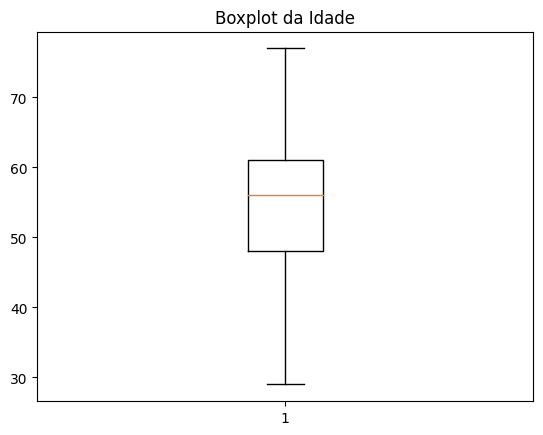

In [ ]:
plt.boxplot(df['age'])
plt.title('Boxplot da Idade')
plt.show()


Podemos ver que não há mais valores discrepantes.

Vamos verificar novamente a correlação entre as variáveis:

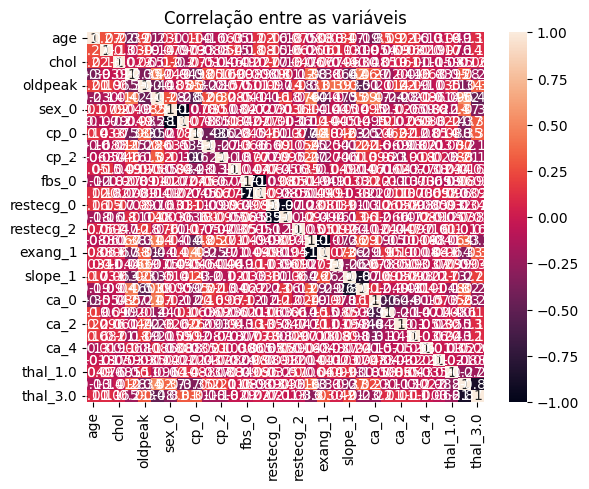

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlação entre as variáveis')
plt.show()


Podemos ver que após o pré-processamento dos dados, a correlação entre as variáveis se manteve praticamente a mesma.

Por fim, vamos visualizar o histograma das classes:

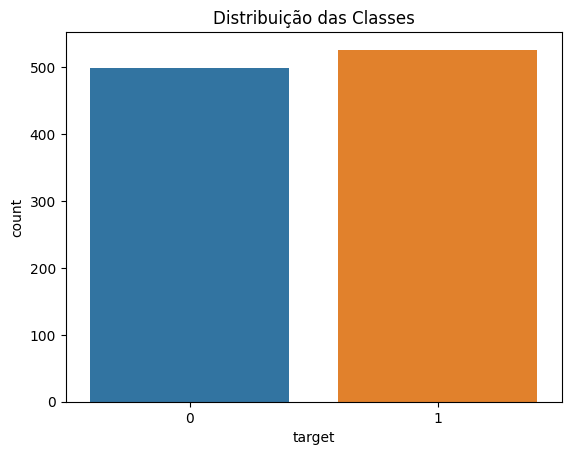

In [ ]:
sns.countplot(x='target', data=df)
plt.title('Distribuição das Classes')
plt.show()


Podemos ver que agora as classes estão balanceadas, o que é importante para a construção de modelos de classificação.

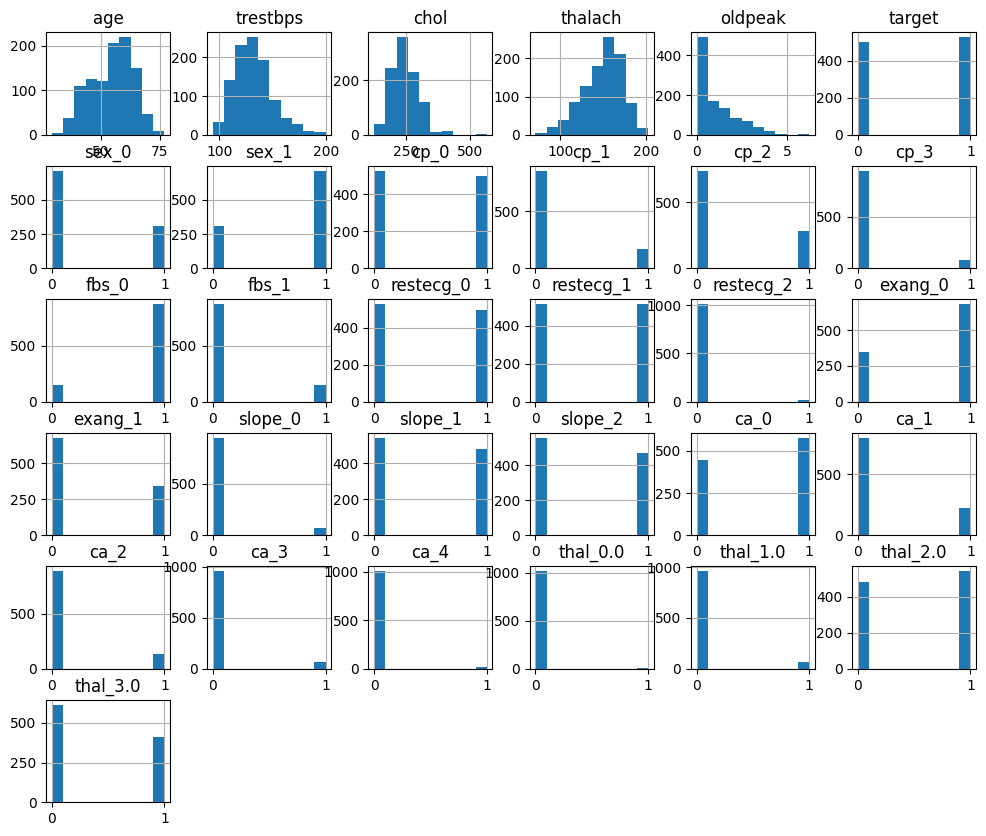

In [ ]:
df.hist(figsize=(12,10))
plt.show()


**Através dos histogramas, podemos verificar que algumas variáveis, como idade e colesterol, possuem uma distribuição mais ou menos normal. Já outras, como pressão sanguínea e número de vasos principais coloridos, possuem uma distribuição mais assimétrica.**

Em seguida, vamos dividir os dados em conjunto de treinamento e teste:

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Podemos ver que agora as classes estão balanceadas, o que é importante para a construção de modelos de classificação.

Em seguida, vamos dividir os dados em conjunto de treinamento e teste:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


Em seguida, vamos criar um modelo de regressão logística e treiná-lo com o conjunto de treinamento:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Agora, vamos avaliar o desempenho do modelo com o conjunto de teste:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# cria uma cópia de X_test
X_test_none = X_test.copy()

lr = LogisticRegression(random_state=42, fit_intercept=False, solver='lbfgs', max_iter=1000)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test_none)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Acurácia:", acc)
print("Precisão:", prec)
print("Revocação:", rec)
print("F1-Score:", f1)


Acurácia: 0.8195121951219512
Precisão: 0.7796610169491526
Revocação: 0.8932038834951457
F1-Score: 0.8325791855203619


In [ ]:
prec = precision_score(y_test, y_pred, zero_division=0)


Criamos um modelo de árvore de decisão e treiná-lo com o conjunto de treinamento:


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Em seguida, avaliamos o desempenho do modelo com o conjunto de teste:

In [ ]:
y_pred = dt.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Acurácia:", acc)
print("Precisão:", prec)
print("Revocação:", rec)
print("F1-Score:", f1)


Acurácia: 0.9853658536585366
Precisão: 1.0
Revocação: 0.970873786407767
F1-Score: 0.9852216748768473


Criamos um modelo de floresta aleatória e treiná-lo com o conjunto de treinamento:

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Desempenho do modelo com o conjunto de teste:

In [ ]:
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Acurácia:", acc)
print("Precisão:", prec)
print("Revocação:", rec)
print("F1-Score:", f1)


Acurácia: 0.9853658536585366
Precisão: 1.0
Revocação: 0.970873786407767
F1-Score: 0.9852216748768473
